## Weighted Age Analysis by Sex

### Objective

This notebook analyses population data by age and sex in Ireland, computing weighted descriptive statistics — mean, median, and standard deviation — using official CSO data.

### Setup Imports and file paths are consolidated for clarity and maintainability.

In [1]:
# Consolidated imports and environment info
import pandas as pd # necessary for data manipulation
import numpy as np # necessary for numerical operations
import os # necessary for operating system interactions
import matplotlib.pyplot as plt # necessary for plotting
import seaborn as sns # necessary for advanced plotting
import requests # necessary for HTTP API interactions
import zipfile # necessary for handling zipped API responses
from io import BytesIO, StringIO # necessary for in-memory file buffers

### Filename and Data Directory Setup

In [2]:
# Notebook path (relative) - derive data folder from current working directory
notebook_dir = os.getcwd()
base_data_dir = os.path.abspath(os.path.join(notebook_dir, '..', 'data'))
os.makedirs(base_data_dir, exist_ok=True)

# variables : relative DATADIR, FILENAME and FULLPATH concatenation for data input
DATADIR = "../data/"
FILENAME = "population_for_analysis.csv"
FULLPATH = os.path.join(DATADIR, FILENAME)

# Notebook display options
pd.options.display.max_rows = 20

print("Base data directory:", base_data_dir)
print("Using relative FULLPATH for pivot/read:", FULLPATH)


Base data directory: c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data
Using relative FULLPATH for pivot/read: ../data/population_for_analysis.csv


### Load Dataset

In [3]:
# 📥 Fetch the full population table from the CSO API and save as population_for_analysis.csv
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"
print('Fetching raw data from URL:', url)

# Read from API and save the raw returned table
df = pd.read_csv(url)
# Ensure data directory exists and save the full raw dataset
os.makedirs(DATADIR, exist_ok=True)
fullpath = FULLPATH  # DATADIR + FILENAME
df.to_csv(fullpath, index=False)
print('Saved raw population data to', os.path.abspath(fullpath))

# 🧾 Explicitly read the saved raw file and display the last 3 rows for verification
from IPython.display import display
saved_df = pd.read_csv(fullpath)
try:
    display(saved_df.tail(3))
except Exception:
    print('Could not display tail of raw data; file saved at', os.path.abspath(fullpath))


Fetching raw data from URL: https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en
Saved raw population data to c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\population_for_analysis.csv
Saved raw population data to c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\population_for_analysis.csv


,STATISTIC,Statistic Label,TLIST(A1),CensusYear,C02199V02655,Sex,C02076V03371,Single Year of Age,C03789V04537,Administrative Counties,UNIT,VALUE
9789,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,12
9790,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-14a4-13a3-e055-000000000001,Donegal County Council,Number,31
9791,FY006AC01,Population,2022,2022,2,Female,650,100 years and over,2ae19629-1495-13a3-e055-000000000001,Monaghan County Council,Number,7


### View Column Names

In [4]:
headers = df.columns.tolist()
headers

['STATISTIC',
 'Statistic Label',
 'TLIST(A1)',
 'CensusYear',
 'C02199V02655',
 'Sex',
 'C02076V03371',
 'Single Year of Age',
 'C03789V04537',
 'Administrative Counties',
 'UNIT',
 'VALUE']

### Extract Gender Based Data From Saved File

In [5]:
import pandas as pd
import os

# 📥 Load raw data
print("Reading raw file from:", os.path.abspath(FULLPATH))
df = pd.read_csv(FULLPATH)

# 🧹 Drop metadata columns if present
drop_cols = [
    'STATISTIC', 'Statistic Label', 'TLIST(A1)', 'CensusYear',
    'C02199V02655', 'C02076V03371', 'C03789V04537', 'Administrative Counties', 'UNIT'
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# 🧑‍🤝‍🧑 Keep only Male and Female rows
df = df[df['Sex'].isin(['Male', 'Female'])]

# 🔢 Clean age labels
df = df[df['Single Year of Age'] != 'All ages']
df['Single Year of Age'] = df['Single Year of Age'].str.replace('Under 1 year', '0')
df['Single Year of Age'] = df['Single Year of Age'].str.replace(r'\D', '', regex=True)

# 🔧 Convert types
df['Single Year of Age'] = df['Single Year of Age'].astype(int)
df['VALUE'] = df['VALUE'].astype(int)

# 📊 Show structure
df.info()

Reading raw file from: c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\population_for_analysis.csv
<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 3296 to 9791
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sex                 6464 non-null   object
 1   Single Year of Age  6464 non-null   int64 
 2   VALUE               6464 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 202.0+ KB


### Write Amended Weighted Statistics to CSV File

In [6]:
# 📈 Pivot: Age vs Sex
df_anal = pd.pivot_table(df, values='VALUE', index='Single Year of Age', columns='Sex')
df_anal = df_anal.sort_index()

# 💾 Save pivot table
output_path = os.path.join(DATADIR, "weighted_stats_by_sex.csv")
df_anal.to_csv(output_path)
print("\nSaved pivot table to:", os.path.abspath(output_path))

# 👀 Display preview
try:
    display(df_anal.head())
except:
    print("Preview unavailable; pivot saved to:", os.path.abspath(output_path))



Saved pivot table to: c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\weighted_stats_by_sex.csv


Sex,Female,Male
Single Year of Age,,
0,1761.6250,1850.6250
1,1721.5625,1804.6875
2,1810.8750,1889.7500
3,1842.6875,1937.5625
4,1863.6875,1980.3750


### Weighted Mean Age by Sex (NumPy)

In [7]:
# 📁 File path
filepath = output_path

# 📥 Load pivot table
df_anal = pd.read_csv(filepath, index_col=0)

# 🧮 Compute weighted mean and weighted std for each sex, save to CSV
results = []
for sex in df_anal.columns:
    weights = df_anal[sex].fillna(0).astype(float)
    ages = df_anal.index.astype(float)

    if weights.sum() > 0:
        wmean = float(np.average(ages, weights=weights))
        wvar = float(np.average((ages - wmean) ** 2, weights=weights))
        wstd = float(np.sqrt(wvar))
        total = int(weights.sum())
        print(f"{sex}: Weighted mean age = {wmean:.2f}, weighted std = {wstd:.2f}")
    else:
        wmean = float('nan')
        wstd = float('nan')
        total = 0
        print(f"{sex}: No population data available")

    results.append((sex, total, wmean, wstd))

mean_std_df = pd.DataFrame(results, columns=['sex', 'total_population', 'weighted_mean_age', 'weighted_std_age']).set_index('sex')

# Save to filename
mean_std_filename = 'weighted_mean_std_by_sex.csv'
mean_std_path = os.path.join(DATADIR, mean_std_filename)
os.makedirs(DATADIR, exist_ok=True)
mean_std_df.to_csv(mean_std_path)
print('\nSaved weighted mean & std to', os.path.abspath(mean_std_path))

# Display results
mean_std_df


Female: Weighted mean age = 38.94, weighted std = 23.00
Male: Weighted mean age = 37.74, weighted std = 22.67

Saved weighted mean & std to c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\weighted_mean_std_by_sex.csv


,total_population,weighted_mean_age,weighted_std_age
sex,,,
Female,162786,38.939796,22.998990
Male,159034,37.739448,22.671204


### Weighted Median and Standard Deviation by Sex

In [8]:
# 📁 Output file path
WEIGHTED_STATS_FILENAME = "weighted_median_std_by_sex.csv"
ws_path = os.path.join(DATADIR, WEIGHTED_STATS_FILENAME)

# 🧮 Compute weighted median and std by sex
results = []

for sex in df_anal.columns:
    weight_series = df_anal[sex].fillna(0).astype(float)
    age_index = df_anal.index.astype(float)
    weight_values = weight_series.to_numpy()
    age_values = age_index.to_numpy()

    if weight_values.sum() > 0:
        cutoff = weight_values.sum() / 2.0
        cumsum = weight_series.cumsum()
        mask = cumsum >= cutoff
        if mask.any():
            wmedian = float(age_index[mask][0])
        else:
            wmedian = np.nan
        wmean = np.average(age_values, weights=weight_values)
        wstd = float(np.sqrt(np.average((age_values - wmean) ** 2, weights=weight_values)))
    else:
        wmedian = wstd = np.nan

    results.append((sex, wmedian, wstd))

# 📊 Create and save results
res_df = pd.DataFrame(results, columns=['sex', 'weighted_median_age', 'weighted_std_age']).set_index('sex')
res_df.to_csv(ws_path)
print("✅ Saved weighted median and std to:", os.path.abspath(ws_path))

# 👀 Display results
res_df


✅ Saved weighted median and std to: c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\weighted_median_std_by_sex.csv


,weighted_median_age,weighted_std_age
sex,,
Female,39.0,22.998990
Male,38.0,22.671204


### Visualisations

Plotting weighted means (loaded from: ../data/weighted_mean_std_by_sex.csv )


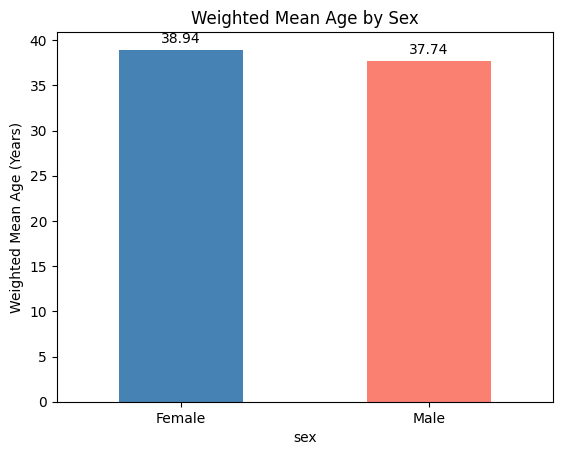

In [9]:
from matplotlib.container import BarContainer

# 📊 Bar chart: Weighted mean age by sex (robustly locate stats file or compute)
candidates = [
    os.path.join(DATADIR, WEIGHTED_STATS_FILENAME),
    os.path.join(DATADIR, 'weighted_mean_std_by_sex.csv'),
    os.path.join(DATADIR, 'weighted_median_std_by_sex.csv'),
    os.path.join(DATADIR, 'weighted_stats_by_sex.csv'),
]

means_series = None
loaded_from = None

for fp in candidates:
    if os.path.exists(fp):
        try:
            df_stats = pd.read_csv(fp, index_col=0)
            for col in ['weighted_mean_age', 'weighted_mean', 'mean']:
                if col in df_stats.columns:
                    means_series = df_stats[col].astype(float)
                    loaded_from = fp
                    break
            # If this file looks like a pivot (has Male/Female columns) compute means
            if means_series is None and set(['Male','Female']).issubset(df_stats.columns):
                pivot = df_stats
                means_calc = {}
                for sex in ['Male','Female']:
                    w = pivot[sex].fillna(0).astype(float)
                    if w.sum() > 0:
                        means_calc[sex] = np.average(pivot.index.astype(float), weights=w)
                    else:
                        means_calc[sex] = float('nan')
                means_series = pd.Series(means_calc, name='weighted_mean_age')
                loaded_from = fp + ' (pivot-computed)'
            if means_series is not None:
                break
        except Exception:
            continue

# Fallback to prepared pivot or in-memory df_anal
if means_series is None:
    prepared_fp = os.path.join(DATADIR, FILENAME.replace('.csv', '_prepared.csv'))
    if os.path.exists(prepared_fp):
        pivot = pd.read_csv(prepared_fp, index_col=0)
        try:
            pivot.index = pivot.index.astype(int)
        except Exception:
            numeric_index = pd.to_numeric(pivot.index.to_series(), errors='coerce')
            pivot.index = pd.Index(numeric_index.fillna(0).astype(int))
        pivot = pivot.sort_index()
        means_calc = {sex: (np.average(pivot.index.astype(float), weights=pivot[sex].fillna(0).astype(float)) if pivot[sex].fillna(0).sum()>0 else float('nan')) for sex in pivot.columns}
        means_series = pd.Series(means_calc, name='weighted_mean_age')
        loaded_from = prepared_fp + ' (computed)'
    elif 'df_anal' in globals():
        pivot = df_anal
        means_calc = {sex: (np.average(pivot.index.astype(float), weights=pivot[sex].fillna(0).astype(float)) if pivot[sex].fillna(0).sum()>0 else float('nan')) for sex in pivot.columns}
        means_series = pd.Series(means_calc, name='weighted_mean_age')
        loaded_from = 'df_anal (in-memory)'

# Plot the bar chart with annotations
if means_series is not None:
    print('Plotting weighted means (loaded from:', loaded_from, ')')
    ax = means_series.plot(kind='bar', title='Weighted Mean Age by Sex', rot=0, color=['steelblue', 'salmon'])
    ax.set_ylabel('Weighted Mean Age (Years)')
    for container in ax.containers:
        if not isinstance(container, BarContainer):
            continue
        heights = [patch.get_height() for patch in container]
        labels = [f"{height:.2f}" if not pd.isna(height) else "NaN" for height in heights]
        ax.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=10)
    plt.show()
else:
    print('No weighted mean data available to plot. Ensure one of the expected files exists or run the analysis cells to generate stats.')


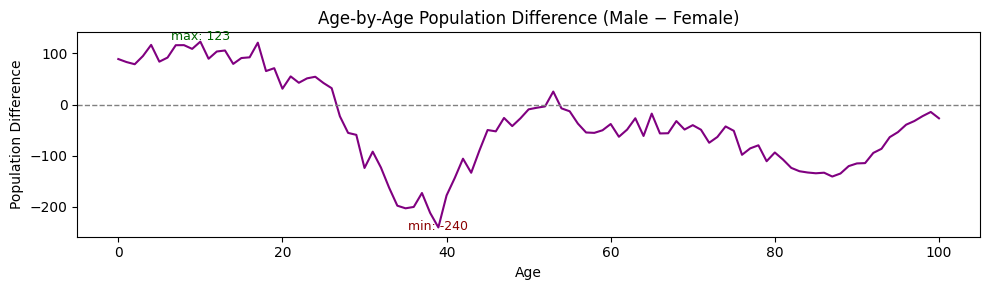

In [10]:
# 📈 Line plot: Age-by-age difference (Male − Female) - display only

# Load df_anal from prepared pivot or memory
df_anal_local = globals().get('df_anal')

if df_anal_local is None:
    prepared_fp = os.path.join(DATADIR, FILENAME.replace('.csv', '_prepared.csv'))
    if os.path.exists(prepared_fp):
        df_anal_local = pd.read_csv(prepared_fp, index_col=0)
        try:
            df_anal_local.index = df_anal_local.index.astype(int)
        except Exception:
            converted_index = pd.to_numeric(df_anal_local.index.to_series(), errors='coerce').fillna(0).astype(int)
            df_anal_local.index = pd.Index(converted_index, name=df_anal_local.index.name)
        df_anal_local = df_anal_local.sort_index()
        globals()['df_anal'] = df_anal_local
    else:
        print('Prepared pivot not found; cannot plot age-difference here')

if df_anal_local is not None and {'Male', 'Female'}.issubset(df_anal_local.columns):
    diff = df_anal_local['Male'].fillna(0) - df_anal_local['Female'].fillna(0)
    fig, ax = plt.subplots(figsize=(10,3))
    diff.plot(ax=ax, color='purple')
    ax.set_title('Age-by-Age Population Difference (Male − Female)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Population Difference')
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    try:
        max_age = int(diff.idxmax())
        min_age = int(diff.idxmin())
        ax.annotate(f"max: {diff.max():.0f}", xy=(max_age, diff.max()), xytext=(max_age, diff.max()*1.02), ha='center', fontsize=9, color='darkgreen')
        ax.annotate(f"min: {diff.min():.0f}", xy=(min_age, diff.min()), xytext=(min_age, diff.min()*1.02), ha='center', fontsize=9, color='darkred')
    except Exception:
        pass
    plt.tight_layout()
    plt.show()
else:
    print('Male and/or Female columns not present in df_anal; cannot create age-difference plot')


In [11]:
# 🗃️ Create and save age_difference_by_sex.csv with columns: age, female, male, difference

AGE_DIFF_FILENAME = "age_difference_by_sex.csv"

prepared_fp = os.path.join(DATADIR, FILENAME.replace('.csv', '_prepared.csv'))
if os.path.exists(prepared_fp):
    pivot = pd.read_csv(prepared_fp, index_col=0)
    try:
        pivot.index = pivot.index.astype(int)
    except Exception:
        numeric_index = pd.to_numeric(pivot.index.to_series(), errors='coerce').fillna(0).astype(int)
        pivot.index = pd.Index(numeric_index, name=pivot.index.name)
    pivot = pivot.sort_index()
elif 'df_anal' in globals():
    pivot = df_anal.copy()
else:
    raise FileNotFoundError('Prepared pivot not found and df_anal not in memory; cannot create age_difference file')

# Ensure Male/Female columns exist; fill missing as 0
male_series = pivot['Male'].fillna(0) if 'Male' in pivot.columns else pd.Series(0, index=pivot.index)
female_series = pivot['Female'].fillna(0) if 'Female' in pivot.columns else pd.Series(0, index=pivot.index)

df_out = pd.DataFrame({
    'age': pivot.index.astype(int),
    'female': female_series.values.astype(int),
    'male': male_series.values.astype(int)
})

df_out['difference'] = df_out['male'] - df_out['female']

# Save CSV
age_diff_fp = os.path.join(DATADIR, AGE_DIFF_FILENAME)
os.makedirs(DATADIR, exist_ok=True)
df_out.to_csv(age_diff_fp, index=False)
print('Saved age-difference CSV to', os.path.abspath(age_diff_fp))

# Display preview
try:
    display(df_out.head())
except Exception:
    print('Saved age-difference CSV to', os.path.abspath(age_diff_fp))


Saved age-difference CSV to c:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\age_difference_by_sex.csv


,age,female,male,difference
0,0,1761,1850,89
1,1,1721,1804,83
2,2,1810,1889,79
3,3,1842,1937,95
4,4,1863,1980,117
